<a href="https://colab.research.google.com/github/Isenlith/ANASIN-II/blob/master/Sinais_DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Funções de base e DCT**

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

In [2]:
# DCT e IDCT do Python

x = [3, 5, 9, 11]
x_dct  = fftpack.dct(x, norm='ortho')
x_idct = fftpack.idct(x_dct, norm='ortho')

print(x_dct)
print(x_idct)

[14.         -6.30864406  0.          0.44834153]
[ 3.  5.  9. 11.]


[[ 1.          1.          1.          1.        ]
 [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
 [ 0.70710678 -0.70710678 -0.70710678  0.70710678]
 [ 0.38268343 -0.92387953  0.92387953 -0.38268343]]
[[ 1.          1.          1.          1.        ]
 [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
 [ 0.70710678 -0.70710678 -0.70710678  0.70710678]
 [ 0.38268343 -0.92387953  0.92387953 -0.38268343]]
[[ 1.          1.          1.          1.        ]
 [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
 [ 0.70710678 -0.70710678 -0.70710678  0.70710678]
 [ 0.38268343 -0.92387953  0.92387953 -0.38268343]]
[[ 1.          1.          1.          1.        ]
 [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
 [ 0.70710678 -0.70710678 -0.70710678  0.70710678]
 [ 0.38268343 -0.92387953  0.92387953 -0.38268343]]


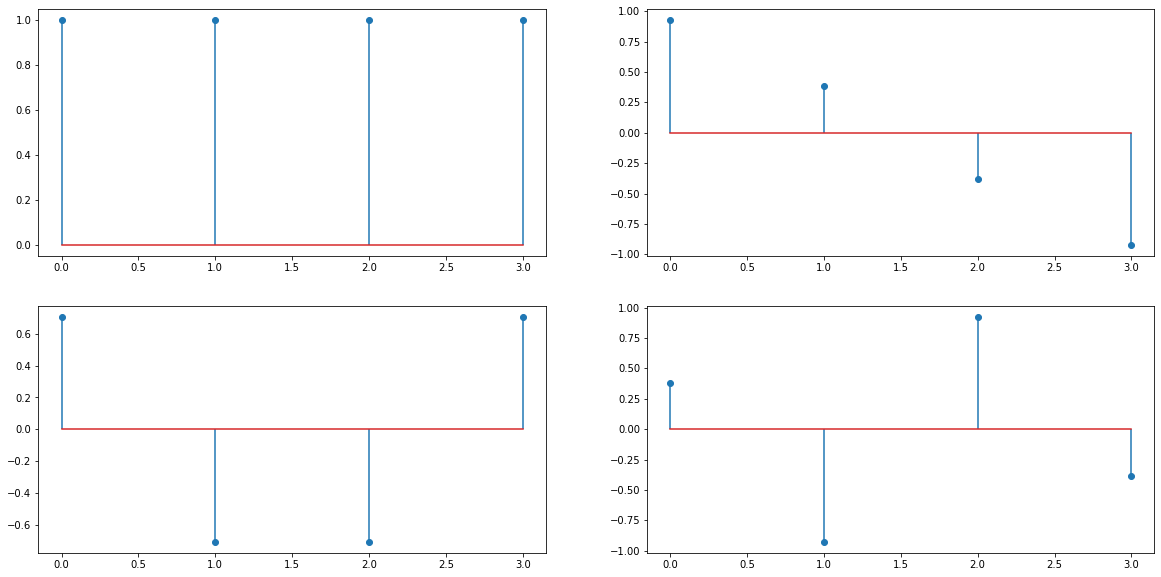

In [38]:
# Funções de base

plt.rcParams["figure.figsize"] = (20, 10)
N = 4
X = np.zeros((N,N))

for k in range(N):
  for n in range(N):
    X[k, n] = np.cos((2*n+1)*k*np.pi /(2*N))

for i in range(N):
  plt.subplot(2,2, i+1)
  plt.stem(X[i,:], use_line_collection="True");

  print(X)

In [36]:
# Implementando minhas DCT e IDCT

from scipy import fftpack

x = [3, 5, 9, 11]

def dct(sinal):
  sinal = np.asarray(sinal) # garantir que o sinal seja um arranjo, não lista
  N = len(sinal) # tamanho do sinal
  C = np.zeros((N,N)) # inicializa os coeficientes

  # Cálculo das funções de base
  for k in range(N):
    for n in range(N):
      C[k, n] = np.cos((2*n+1)*k*np.pi /(2*N))

  C[0, :] = (1/np.sqrt(N)) * C[0, :] # normalização para k = 0
  C[1::, :] = (np.sqrt(2/N)) * C[1::, :] # normalização para k != 0

  x_dct = C.dot(sinal) # produto matricial

  return np.asarray(x_dct)

def idct(sinal_dct):
  sinal_dct = np.asarray(sinal_dct) # garantir que o sinal seja um arranjo, não lista
  N = len(sinal_dct) # tamanho do sinal
  C = np.zeros((N,N)) # inicializa os coeficientes

  # Cálculo das funções de base
  for k in range(N):
    for n in range(N):
      C[k, n] = np.cos((2*n+1)*k*np.pi /(2*N))

  C[0, :] = (1/np.sqrt(N)) * C[0, :] # normalização para k = 0
  C[1::, :] = (np.sqrt(2/N)) * C[1::, :] # normalização para k != 0
  
  x_idct = (C.transpose()).dot(sinal_dct) # produto matricial

  return np.asarray(x_idct)

print("Minha DCT:\n ", dct(x), "\n")
print("DCT do Python:\n ", fftpack.dct(x, norm="ortho"), "\n") 
print("Minha IDCT:\n ", idct(dct(x)), "\n")
print("Sinal original:\n ", x)

Minha DCT:
  [ 1.40000000e+01 -6.30864406e+00 -1.33226763e-15  4.48341529e-01] 

DCT do Python:
  [14.         -6.30864406  0.          0.44834153] 

Minha IDCT:
  [ 3.  5.  9. 11.] 

Sinal original:
  [3, 5, 9, 11]
